In [1]:
import numpy as np
import pickle as pkl
from pprint import pprint
import os
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

plt.ion()

In [2]:
dr='/Users/tianyichen/Desktop/Research /PhDresearch/Hopkins_Organoid/2024May28 No window data /OneDrive_1_6-17-2024/Run_8_TBS_Experiment_ecr_results/'

In [3]:
os.chdir(dr)

In [4]:
dr1=dr+'230601 RUN 8 Wells 1-3'
dr2=dr+'230602 RUN 8 Wells 4-6'

filenames=os.listdir(dr1)
filenames.remove('.DS_Store')
sorted_filenames = sorted(filenames, key=lambda x: int(x.split('#')[1].split()[0]))

sorted_filenames_updated1=['230601 RUN 8 Wells 1-3/'+filename + '/data.raw_20240521_16h16m.pkl' for filename in sorted_filenames]

filenames=os.listdir(dr2)
filenames.remove('.DS_Store')
sorted_filenames = sorted(filenames, key=lambda x: int(x.split('#')[1].split()[0]))
sorted_filenames_updated2=['230602 RUN 8 Wells 4-6/'+filename + '/data.raw_20240521_16h16m.pkl' for filename in sorted_filenames]
sorted_filenames_updated=sorted_filenames_updated1+sorted_filenames_updated2

In [5]:
len(sorted_filenames_updated)

36

In [6]:
sorted_filenames_updated

['230601 RUN 8 Wells 1-3/#1 (baseline)/data.raw_20240521_16h16m.pkl',
 '230601 RUN 8 Wells 1-3/#2 (well #1 post stim 1)/data.raw_20240521_16h16m.pkl',
 '230601 RUN 8 Wells 1-3/#3 (well #1 post stim 2)/data.raw_20240521_16h16m.pkl',
 '230601 RUN 8 Wells 1-3/#4 (well #1 post stim 3)/data.raw_20240521_16h16m.pkl',
 '230601 RUN 8 Wells 1-3/#5 (well #1 post stim 4)/data.raw_20240521_16h16m.pkl',
 '230601 RUN 8 Wells 1-3/#6 (well #2 post stim 1)/data.raw_20240521_16h16m.pkl',
 '230601 RUN 8 Wells 1-3/#7 (well #2 post stim 2)/data.raw_20240521_16h16m.pkl',
 '230601 RUN 8 Wells 1-3/#8 (well #2 post stim 3)/data.raw_20240521_16h16m.pkl',
 '230601 RUN 8 Wells 1-3/#9 (well #2 post stim 4)/data.raw_20240521_16h16m.pkl',
 '230601 RUN 8 Wells 1-3/#10 (well #3 post stim 1)/data.raw_20240521_16h16m.pkl',
 '230601 RUN 8 Wells 1-3/#11 (well #3 post stim 2)/data.raw_20240521_16h16m.pkl',
 '230601 RUN 8 Wells 1-3/#12 (well #3 post stim 3)/data.raw_20240521_16h16m.pkl',
 '230601 RUN 8 Wells 1-3/#13 (well #

In [69]:
df = pd.read_csv('/Users/tianyichen/Desktop/Research /PhDresearch/Hopkins_Organoid/April 19 2024/Time-file.csv')
df['time'] = pd.to_datetime(df['Unnamed: 1'].astype(str) + ' ' + df['Unnamed: 2'].astype(str), errors='coerce')

for i in df.loc[df['Unnamed: 2'].isnull(),'time'].index:
    df.loc[i,'time'] = df.loc[i-1,'time']+pd.Timedelta(10,'min')

well=5
stimulus_time=df[df[str(well)]==True]['time']
time=df[df['Unnamed: 2'].notna()]['time']
time_diff = [(t - time[0]).total_seconds() / 60 for t in time]
stimulus_time_diff = [(t - time[0]).total_seconds() / 60 for t in stimulus_time]

In [8]:
len(time_diff)

36

In [10]:
def filter_matrix_TC(data, well):

    # Extract necessary data from the loaded data structure
    adj_matrix = data[well]['win_0']['adj_matrix_predicted']
    votes = data[well]['win_0']['votes']  # This variable is loaded but not used in the snippet you provided
    corr_peaks = data[well]['win_0']['corr_peaks']
    fs = data['config']['data']['fs']  # Sampling frequency

    # Initialize a matrix to track synchronization based on correlation peaks
    synced_matrix = np.full(adj_matrix.shape, False)
    for key in corr_peaks.keys():
        if np.all(np.abs(np.array(corr_peaks[key]['delays'])) < 1/fs):
            synced_matrix[key[0], key[1]] = True
            synced_matrix[key[1], key[0]] = True

    # Create the filtered matrix as per the given logic
    filtered_matrix = np.logical_and(adj_matrix, np.logical_not(synced_matrix))

    return filtered_matrix

In [66]:
well='well005'

In [13]:
all_adj = []
num_vertices = []
for i in range(len(sorted_filenames_updated)):
    with open(sorted_filenames_updated[i], 'rb') as f:
        data = pkl.load(f)
    adj = filter_matrix_TC(data, well)
    all_adj.append(adj)
    num_vertices.append(adj.shape[0])
    print(i,sum(sum(adj)), adj.shape[0] )


0 31355 952
1 40888 958
2 40676 958
3 38080 950
4 40165 951
5 36918 947
6 35921 950
7 41839 951
8 38658 945
9 31254 953
10 47828 946
11 40237 947
12 40647 950
13 35431 952
14 31065 944
15 39226 956
16 36920 951
17 33842 951
18 28985 937
19 28894 930
20 31973 935
21 34362 942
22 27013 931
23 25759 933
24 33287 934
25 29623 933
26 31572 939
27 34959 935
28 29862 930
29 30994 936
30 31268 936
31 31132 933
32 26694 929
33 34483 938
34 37937 936
35 30516 936


/Users/tianyichen/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


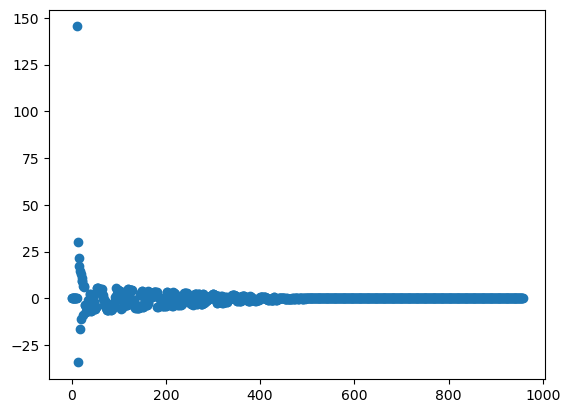

In [14]:
s,u=np.linalg.eig(all_adj[1])
plt.scatter(range(all_adj[1].shape[0]),s)

In [15]:
## add zeros to the adj mat such that they have the same dims 
dim = max(num_vertices) # Max number of vertices to determine dimension
m=len(all_adj)
adj_aug = np.zeros((m, dim, dim))  # Pre-allocate a zero matrix of the desired size
for i in range(m):
    ma = all_adj[i]  
    l = ma.shape[0]  
    adj_aug[i, :l, :l] = ma 

In [23]:
graph_matching=False

from scipy.optimize import quadratic_assignment
from numpy import linalg as LA
adj_gm=np.zeros([m,dim,dim])
adj_gm[0]=adj_aug[0] ## use the first graph as baseline

count = len([x for x in time_diff if x < 400])
for i in range(0, count):
    adj_gm[i] = adj_aug[i]
    #print(time_diff[i])

## only match between two days
res = quadratic_assignment(adj_aug[count-1],adj_aug[count],options = {'maximize': True})
perm = res['col_ind']
adj_gm[count] = adj_aug[count][perm][:,perm]

for i in range(count, m):
    adj_gm[i] = adj_aug[i][perm][:,perm]
    #print(time_diff[i])


In [16]:
graph_matching=True

from scipy.optimize import quadratic_assignment
from numpy import linalg as LA
adj_gm=np.zeros([m,dim,dim])
adj_gm[0]=adj_aug[0] ## use the first graph as baseline
for i in range(1, m):
    res = quadratic_assignment(adj_gm[i-1],adj_aug[i],options = {'maximize': True})
    perm = res['col_ind']
    ofv=res['fun']
    fun_I = np.trace(adj_aug[i].T  @ adj_gm[i-1] )
    adj_gm[i]=adj_aug[i][perm][:,perm]
    before_norm = LA.norm(adj_aug[i] - adj_gm[i-1], 'fro')
    after_norm = LA.norm(adj_gm[i] - adj_gm[i-1], 'fro')

     # Printing the before and after norms to see the difference
    print(f"Frob diff before GM: {before_norm}, After GM: {after_norm},OFV before GM: {fun_I}, After GM: {ofv}")

Frob diff before GM: 257.0894785867364, After GM: 169.1360399205326,OFV before GM: 3074.0, After GM: 21818.0
Frob diff before GM: 278.25887227544064, After GM: 172.2149819266605,OFV before GM: 2068.0, After GM: 25953.0
Frob diff before GM: 268.92378102354576, After GM: 173.14733610425543,OFV before GM: 3218.0, After GM: 24388.0
Frob diff before GM: 270.67877641218934, After GM: 173.92814608337548,OFV before GM: 2489.0, After GM: 23997.0
Frob diff before GM: 270.48290149286703, After GM: 175.48504209761012,OFV before GM: 1961.0, After GM: 23144.0
Frob diff before GM: 263.6759374687042, After GM: 174.10628937519746,OFV before GM: 1657.0, After GM: 21263.0
Frob diff before GM: 269.83698782783654, After GM: 172.23820714347906,OFV before GM: 2474.0, After GM: 24047.0
Frob diff before GM: 275.5739465188972, After GM: 173.73255308087772,OFV before GM: 2278.0, After GM: 25157.0
Frob diff before GM: 254.22824390692708, After GM: 166.2648489609274,OFV before GM: 2640.0, After GM: 21134.0
Frob di

In [17]:
choosen_time_points=range(m)
from scipy.linalg import orthogonal_procrustes
tm=choosen_time_points

D=np.zeros([len(tm),len(tm)])

In [ ]:
## find the connected component for the common edge subgraph 
[a,ind]=graspologic_utils.largest_connected_component(prod,return_inds=True)
len(ind)
n=len(ind)
n

In [18]:
glist=np.zeros([len(choosen_time_points),len(ind),len(ind)])
Xhat_list=np.zeros([len(tm),n,2*ed])

NameError: name 'ind' is not defined

In [23]:
import graspologic.utils as graspologic_utils
from graspologic.embed import AdjacencySpectralEmbed

In [24]:
for i in range(len(tm)):
    for j in range(len(tm)):
        prod=adj_gm[choosen_time_points[i]] * adj_gm[choosen_time_points[j]]
        [a,ind]=graspologic_utils.largest_connected_component(prod,return_inds=True)
        n=len(ind)
        print(i,j,n)
        glist=np.zeros([len(choosen_time_points),len(ind),len(ind)])
        glist[i]=adj_gm[choosen_time_points[i]][ind][:,ind]
        glist[j]=adj_gm[choosen_time_points[j]][ind][:,ind]
        print(graspologic_utils.is_fully_connected(glist[i]))

        ed=1
        Xhat_list=np.zeros([len(tm),n,2*ed])
        ase = AdjacencySpectralEmbed(n_components=ed)
        Xhat, Yhat = ase.fit_transform(glist[i])
        Xhat_list[i][:,list(np.arange(ed))]=Xhat
        Xhat_list[i][:,list(np.arange(ed,2*ed))]=Yhat

        Xhat, Yhat = ase.fit_transform(glist[j])
        Xhat_list[j][:,list(np.arange(ed))]=Xhat
        Xhat_list[j][:,list(np.arange(ed,2*ed))]=Yhat

        R, sca = orthogonal_procrustes(Xhat_list[i] , Xhat_list[j] )
        D[i,j]=LA.norm(Xhat_list[i] @ R -  Xhat_list[j],2)**2/n  #Frobenius norm

0 0 458
True
0 1 451
True
0 2 427
True
0 3 407
True
0 4 407
True
0 5 407
True
0 6 408
True
0 7 403
True
0 8 397
True
0 9 373
True
0 10 395
True
0 11 391
True
0 12 390
True
0 13 377
True
0 14 366
True
0 15 381
True
0 16 373
True
0 17 370
True
0 18 351
True
0 19 356
True
0 20 359
True
0 21 358
True
0 22 330
True
0 23 325
True
0 24 340
True
0 25 329
True
0 26 334
True
0 27 341
True
0 28 322
True
0 29 326
True
0 30 330
True
0 31 329
True
0 32 317
True
0 33 331
True
0 34 337
True
0 35 320
True
1 0 451
True
1 1 520
True
1 2 505
True
1 3 459
True
1 4 450
True
1 5 441
True
1 6 427
True
1 7 440
True
1 8 426
True
1 9 401
True
1 10 424
True
1 11 418
True
1 12 414
True
1 13 399
True
1 14 383
True
1 15 399
True
1 16 393
True
1 17 393
True
1 18 373
True
1 19 374
True
1 20 379
True
1 21 382
True
1 22 350
True
1 23 345
True
1 24 358
True
1 25 343
True
1 26 353
True
1 27 356
True
1 28 345
True
1 29 345
True
1 30 351
True
1 31 351
True
1 32 334
True
1 33 350
True
1 34 356
True
1 35 338
True
2 0 427
True

In [31]:
from graspologic.datasets import load_drosophila_right
from graspologic.plot import heatmap
from graspologic.utils import binarize, symmetrize
import graspologic.utils as graspologic_utils

In [33]:
from graspologic.embed import AdjacencySpectralEmbed
from scipy.linalg import orthogonal_procrustes

<AxesSubplot:title={'center':'Distance matrix between time points'}>

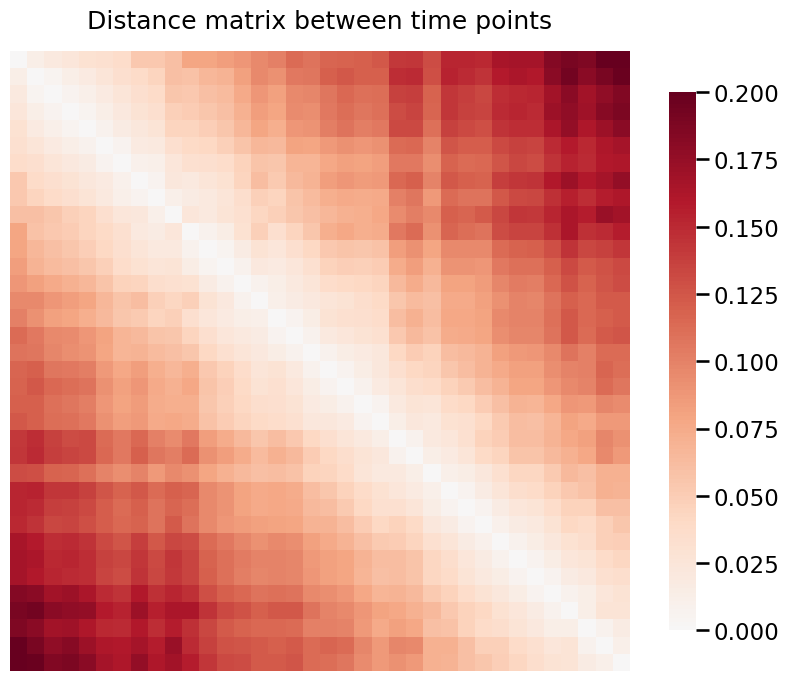

In [28]:
from graspologic.plot import heatmap
heatmap(D, title="Distance matrix between time points")

Text(0, 0.5, 'eigen value')

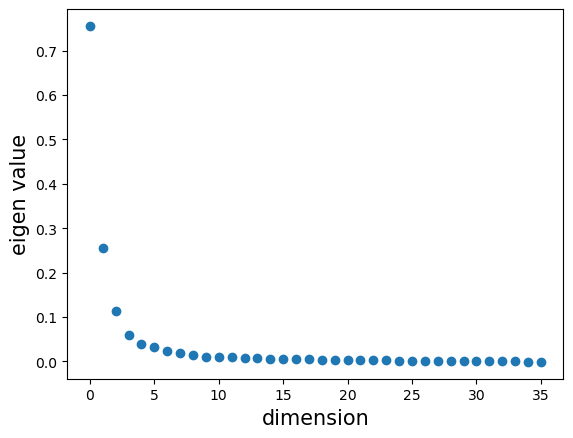

In [29]:
J=np.ones([len(tm),len(tm)])/len(tm)
I=np.eye(len(tm))
P=I-J

H=(-1/2)*P@D@P
w,v=LA.eig(H)
idx = w.argsort()[::-1]   
w = w[idx]
v = v[:,idx]
plt.scatter(range(len(tm)),w) 
#plt.title('scree plot for MDS')
plt.xlabel('dimension',fontsize=15)
plt.ylabel('eigen value',fontsize=15)

In [30]:
w

array([ 7.55475328e-01,  2.55675198e-01,  1.14582686e-01,  6.01380130e-02,
        3.96103929e-02,  3.19640558e-02,  2.46915379e-02,  1.86114471e-02,
        1.52444550e-02,  1.04896194e-02,  9.67919168e-03,  9.27864750e-03,
        8.21329160e-03,  7.12928679e-03,  6.62766004e-03,  5.69761864e-03,
        5.07391734e-03,  4.81342128e-03,  4.39588578e-03,  4.15047466e-03,
        3.33644585e-03,  2.93120611e-03,  2.58116406e-03,  2.40037050e-03,
        2.14013149e-03,  1.85894003e-03,  1.60760655e-03,  1.45335254e-03,
        1.22303446e-03,  1.10064758e-03,  5.64753650e-04,  4.14294362e-04,
        4.36700231e-05,  6.69539716e-18, -5.77037763e-04, -9.83556150e-04])

In [33]:
d=3
MDS=v[:,:d] @ np.diag(np.sqrt(w[:d]))

In [31]:
time

0    2023-06-01 15:24:31
2    2023-06-01 15:37:43
4    2023-06-01 15:50:57
6    2023-06-01 16:04:12
8    2023-06-01 16:17:25
10   2023-06-01 16:35:33
12   2023-06-01 16:48:47
14   2023-06-01 17:02:01
16   2023-06-01 17:15:16
18   2023-06-01 17:35:19
20   2023-06-01 17:48:34
22   2023-06-01 18:01:47
24   2023-06-01 18:15:00
25   2023-06-01 18:34:34
26   2023-06-01 19:04:50
27   2023-06-01 19:34:42
28   2023-06-01 20:04:22
29   2023-06-01 20:34:32
30   2023-06-02 14:24:58
32   2023-06-02 14:38:11
34   2023-06-02 14:51:24
36   2023-06-02 15:04:38
38   2023-06-02 15:17:53
40   2023-06-02 15:36:19
42   2023-06-02 15:49:36
44   2023-06-02 16:02:53
46   2023-06-02 16:16:10
48   2023-06-02 16:37:08
50   2023-06-02 16:50:23
52   2023-06-02 17:03:37
54   2023-06-02 17:16:52
55   2023-06-02 17:37:00
56   2023-06-02 18:06:51
57   2023-06-02 18:35:55
58   2023-06-02 19:06:38
59   2023-06-02 19:36:01
Name: time, dtype: datetime64[ns]

In [32]:
time2 = np.array(time)
time2[18:m] -= 1050
time2

array(['2023-06-01T15:24:31.000000000', '2023-06-01T15:37:43.000000000',
       '2023-06-01T15:50:57.000000000', '2023-06-01T16:04:12.000000000',
       '2023-06-01T16:17:25.000000000', '2023-06-01T16:35:33.000000000',
       '2023-06-01T16:48:47.000000000', '2023-06-01T17:02:01.000000000',
       '2023-06-01T17:15:16.000000000', '2023-06-01T17:35:19.000000000',
       '2023-06-01T17:48:34.000000000', '2023-06-01T18:01:47.000000000',
       '2023-06-01T18:15:00.000000000', '2023-06-01T18:34:34.000000000',
       '2023-06-01T19:04:50.000000000', '2023-06-01T19:34:42.000000000',
       '2023-06-01T20:04:22.000000000', '2023-06-01T20:34:32.000000000',
       '2023-06-02T14:24:57.999998950', '2023-06-02T14:38:10.999998950',
       '2023-06-02T14:51:23.999998950', '2023-06-02T15:04:37.999998950',
       '2023-06-02T15:17:52.999998950', '2023-06-02T15:36:18.999998950',
       '2023-06-02T15:49:35.999998950', '2023-06-02T16:02:52.999998950',
       '2023-06-02T16:16:09.999998950', '2023-06-02

In [37]:
time_diff

[0.0,
 13.2,
 26.433333333333334,
 39.68333333333333,
 52.9,
 71.03333333333333,
 84.26666666666667,
 97.5,
 110.75,
 130.8,
 144.05,
 157.26666666666668,
 170.48333333333332,
 190.05,
 220.31666666666666,
 250.18333333333334,
 279.85,
 310.01666666666665,
 1380.45,
 1393.6666666666667,
 1406.8833333333334,
 1420.1166666666666,
 1433.3666666666666,
 1451.8,
 1465.0833333333333,
 1478.3666666666666,
 1491.65,
 1512.6166666666666,
 1525.8666666666666,
 1539.1,
 1552.35,
 1572.4833333333333,
 1602.3333333333333,
 1631.4,
 1662.1166666666666,
 1691.5]

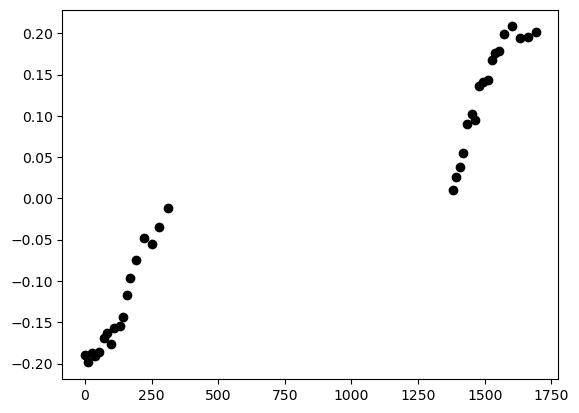

In [38]:
plt.scatter(time_diff,MDS[:,0],color='black')

Intercept: -0.2151114371356969
Slope: [0.0006448]
Confidence Interval for Slope: [0.00056144 0.00072816]


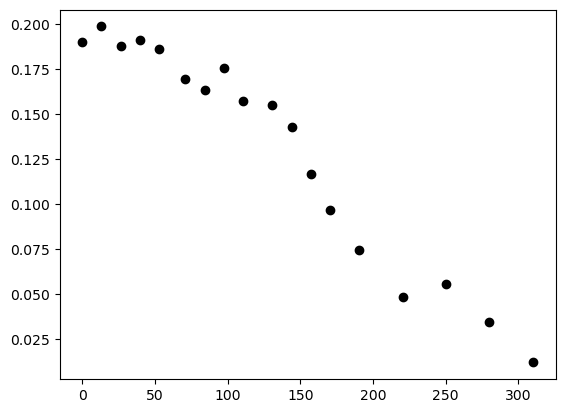

In [39]:
import numpy as np 
from sklearn.linear_model import LinearRegression

x = np.array((list(time_diff))[:18])
y = MDS[:18, 0]

reg = LinearRegression().fit(x.reshape(-1, 1), y)
# Access the coefficient from the LinearRegression model

# Print the coefficient
intercept = reg.intercept_
slope = reg.coef_

print("Intercept:", intercept)
print("Slope:", slope)

plt.scatter(x,-y,color='black')
import statsmodels.api as sm

# Fit the linear regression model
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

# Get the confidence interval for the slope
confidence_interval = results.conf_int()[1]

print("Confidence Interval for Slope:", confidence_interval)




Intercept: -1.3356435919932428
Slope: [0.00098226]
Confidence Interval for Slope: [0.00087035 0.00109417]


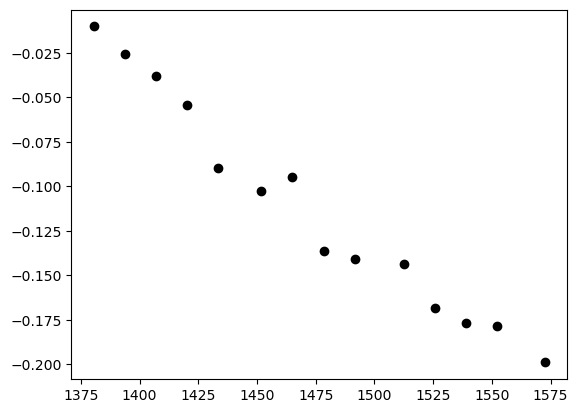

In [43]:
import numpy as np 
from sklearn.linear_model import LinearRegression

x = np.array((list(time_diff))[18:32])
y = MDS[18:32, 0]

reg = LinearRegression().fit(x.reshape(-1, 1), y)
# Access the coefficient from the LinearRegression model

# Print the coefficient
intercept = reg.intercept_
slope = reg.coef_

print("Intercept:", intercept)
print("Slope:", slope)

# Fit the linear regression model
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

# Get the confidence interval for the slope
confidence_interval = results.conf_int()[1]

print("Confidence Interval for Slope:", confidence_interval)


plt.scatter(x,-y,color='black')

Text(0, 0.5, 'dim 2')

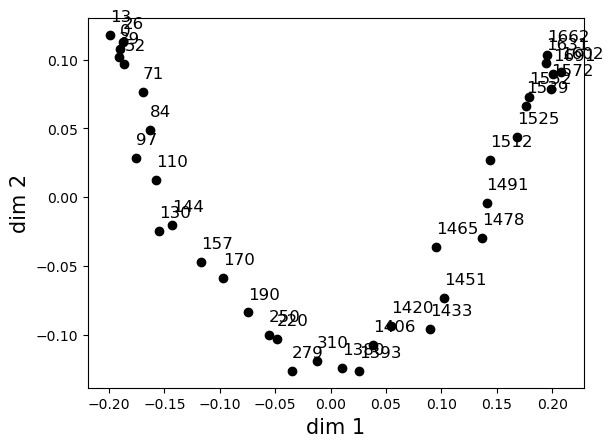

In [44]:
plt.scatter(MDS[:,0],-MDS[:,1],color='black')
for i in range(len(tm)):
    plt.text(MDS[i,0],-MDS[i,1]+0.01,int(time_diff[choosen_time_points[i]]), fontsize=12)
plt.xlabel("dim 1",fontsize=15)
plt.ylabel("dim 2",fontsize=15)

In [45]:
from sklearn.manifold import Isomap

In [46]:
embedding = Isomap(n_neighbors=5,n_components=1)
iso = embedding.fit_transform(MDS)

In [40]:
time = [time_diff[choosen_time_points[i]] for i in range(len(choosen_time_points))]

In [44]:
time

[0.0,
 13.2,
 26.433333333333334,
 39.68333333333333,
 52.9,
 71.03333333333333,
 84.26666666666667,
 97.5,
 110.75,
 130.8,
 144.05,
 157.26666666666668,
 170.48333333333332,
 190.05,
 220.31666666666666,
 250.18333333333334,
 279.85,
 310.01666666666665,
 1380.45,
 1393.6666666666667,
 1406.8833333333334,
 1420.1166666666666,
 1433.3666666666666,
 1451.8,
 1465.0833333333333,
 1478.3666666666666,
 1491.65,
 1512.6166666666666,
 1525.8666666666666,
 1539.1,
 1552.35,
 1572.4833333333333,
 1602.3333333333333,
 1631.4,
 1662.1166666666666,
 1691.5]

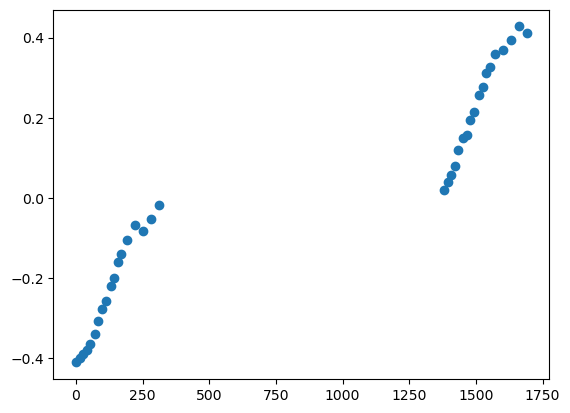

In [48]:
plt.scatter(time_diff,iso)

In [63]:
import piecewise_regression
pw_fit = piecewise_regression.Fit(time_diff, iso[:,0], n_breakpoints=3)

In [64]:
pw_fit.summary()


                    Breakpoint Regression Results                     
No. Observations                       36
No. Model Parameters                    8
Degrees of Freedom                     28
Res. Sum of Squares            0.00535658
Total Sum of Squares              2.54452
R Squared                        0.997895
Adjusted R Squared               0.997271
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const               -0.43683      0.00657       -66.52      2.26e-32     -0.45028     -0.42338
alpha1            0.00168233     5.48e-05       30.705      4.18e-23    0.0015701    0.0017946
beta1            -0.00161661     5.67e-05      -28.524             -   -0.0017327   -0.0015005
beta2             0.00178199     7.99e-05        22.29             -    0.0016182    0.0019458
beta3            

'\n                    Breakpoint Regression Results                     \n====================================================================================================\nNo. Observations                       36\nNo. Model Parameters                    8\nDegrees of Freedom                     28\nRes. Sum of Squares            0.00535658\nTotal Sum of Squares              2.54452\nR Squared                        0.997895\nAdjusted R Squared               0.997271\nConverged:                           True\n====================================================================================================\n====================================================================================================\n                    Estimate      Std Err            t        P>|t|       [0.025       0.975]\n----------------------------------------------------------------------------------------------------\nconst               -0.43683      0.00657       -66.52      2.26e-32     -0.45

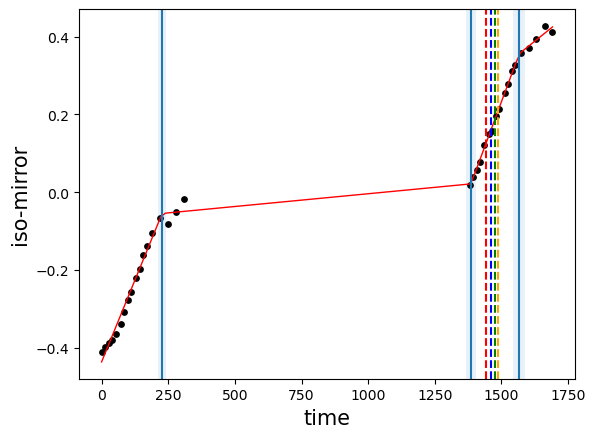

In [70]:
### result for using iso-mirror
pw_fit.plot_data(color='black',s=15)
pw_fit.plot_fit(color="red", linewidth=1)
pw_fit.plot_breakpoints()
pw_fit.plot_breakpoint_confidence_intervals()
plt.xlabel("time",fontsize=15)
plt.ylabel("iso-mirror",fontsize=15)
#plt.title('Well 34')
#for i in range(30):
#    plt.text(day[i]-1,iso[i,0]+0.01,str(int(day[i])), fontsize=7)
#plt.savefig('well_34_approx_FC.pdf',bbox_inches='tight')

plt.axvline(x=stimulus_time_diff[0], color='red', linestyle='--', label='stimu 1')
plt.axvline(x=stimulus_time_diff[1], color='blue', linestyle='--', label='stimu 2')
plt.axvline(x=stimulus_time_diff[2], color='green', linestyle='--', label='stimu 3')
plt.axvline(x=stimulus_time_diff[3], color='orange', linestyle='--', label='stimu 4')

plt.show()
plt.close()

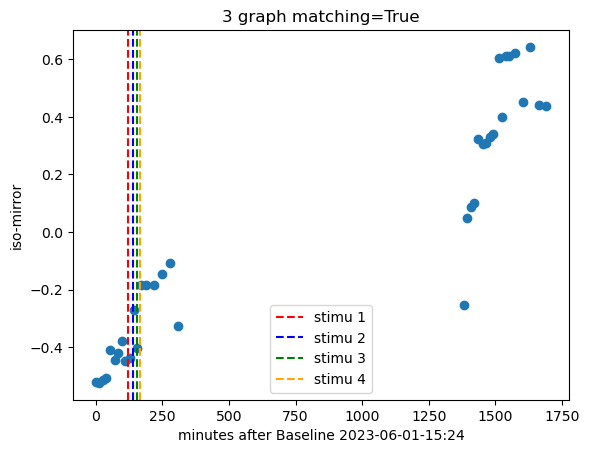

In [65]:

# Plot the scatter plot
plt.scatter(time_diff,iso)

# Add vertical lines
plt.axvline(x=stimulus_time_diff[0], color='red', linestyle='--', label='stimu 1')
plt.axvline(x=stimulus_time_diff[1], color='blue', linestyle='--', label='stimu 2')
plt.axvline(x=stimulus_time_diff[2], color='green', linestyle='--', label='stimu 3')
plt.axvline(x=stimulus_time_diff[3], color='orange', linestyle='--', label='stimu 4')

# Set the x-axis label and y-axis label
plt.xlabel('minutes after Baseline 2023-06-01-15:24')
plt.ylabel('iso-mirror')

# Add a title
plt.title(str(well)+' graph matching='+str(graph_matching))

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [167]:
time

[1380.45,
 1393.6666666666667,
 1406.8833333333334,
 1420.1166666666666,
 1433.3666666666666,
 1451.8,
 1465.0833333333333,
 1478.3666666666666,
 1491.65,
 1512.6166666666666,
 1525.8666666666666,
 1539.1,
 1552.35,
 1572.4833333333333,
 1602.3333333333333,
 1631.4,
 1662.1166666666666,
 1691.5]

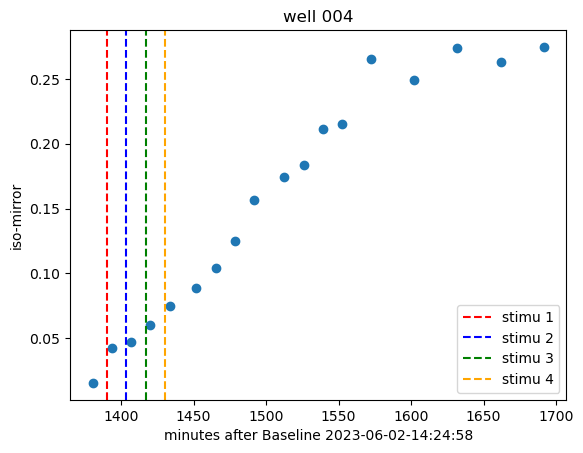

In [149]:
# Plot the scatter plot
plt.scatter(time[18:], -iso[18:])

# Add vertical lines
plt.axvline(x=stimulus_time_diff[0], color='red', linestyle='--', label='stimu 1')
plt.axvline(x=stimulus_time_diff[1], color='blue', linestyle='--', label='stimu 2')
plt.axvline(x=stimulus_time_diff[2], color='green', linestyle='--', label='stimu 3')
plt.axvline(x=stimulus_time_diff[3], color='orange', linestyle='--', label='stimu 4')

# Set the x-axis label and y-axis label
plt.xlabel('minutes after Baseline 2023-06-02-14:24:58')
plt.ylabel('iso-mirror')

# Add a title
plt.title('well 004')

# Add a legend
plt.legend()

# Show the plot
plt.show()
